In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow as tf
from scipy.sparse import csr_matrix
import pickle
#visualisation
import seaborn as sns                       
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('Language Detection.csv')
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [50]:
language_counts = df["Language"].value_counts().reset_index()
language_counts.columns = ["Language", "Count"]
# Display the new DataFrame
print(language_counts)

      Language  Count
0      English   1385
1       French   1014
2      Spanish    819
3   Portugeese    739
4      Italian    698
5      Russian    692
6     Sweedish    676
7    Malayalam    594
8        Dutch    546
9       Arabic    536
10     Turkish    474
11      German    470
12       Tamil    469
13      Danish    428
14     Kannada    369
15       Greek    365
16       Hindi     63


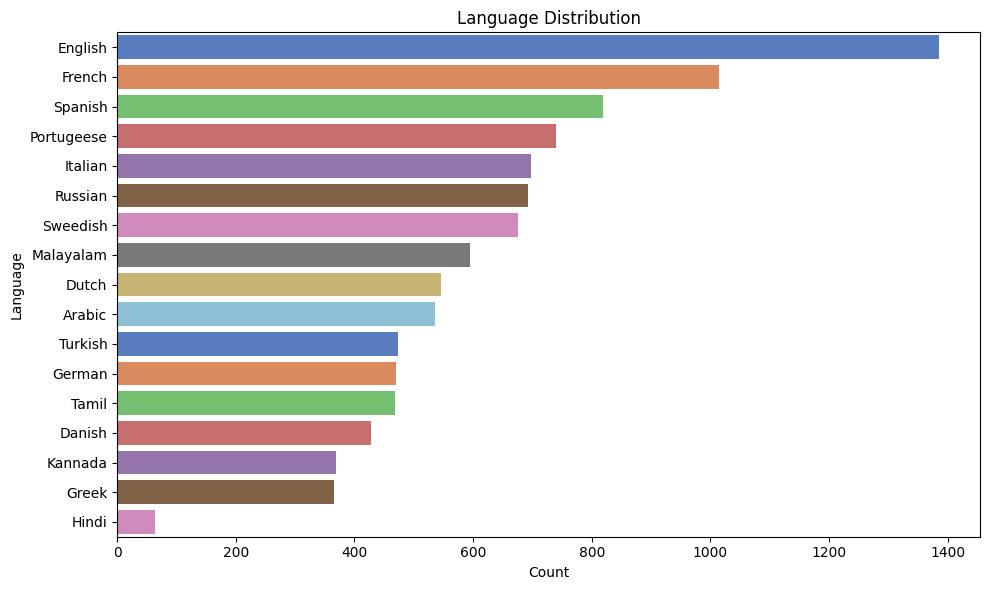

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Language', data=language_counts, palette='muted')
plt.xlabel('Count')
plt.ylabel('Language')
plt.title('Language Distribution')
plt.tight_layout()
plt.show()

In [52]:
# splitting the df to test and train data
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42)

In [53]:
# Tokenize and vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [54]:
# Encode the language labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

In [29]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               4455552   
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 17)                561       
                                                                 
Total params: 4466449 (17.04 MB)
Trainable params: 4466449 (17.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# manually splitting the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [32]:
# Convert sparse matrices to TensorFlow Sparse Tensors
X_train_sparse = tf.convert_to_tensor(csr_matrix(X_train).todense(), dtype=tf.float32)
X_val_sparse = tf.convert_to_tensor(csr_matrix(X_val).todense(), dtype=tf.float32)
X_test_sparse = tf.convert_to_tensor(csr_matrix(X_test).todense(), dtype=tf.float32)

In [33]:
# train the model using the train data
history = model.fit(X_train_sparse, y_train, epochs=10, batch_size=32, validation_data=(X_val_sparse, y_val))

Epoch 1/10
207/207 [==============================] - 5s 17ms/step - loss: 0.9279 - accuracy: 0.8363 - val_loss: 0.2098 - val_accuracy: 0.9661
Epoch 2/10
207/207 [==============================] - 3s 13ms/step - loss: 0.1025 - accuracy: 0.9867 - val_loss: 0.1423 - val_accuracy: 0.9692
Epoch 3/10
207/207 [==============================] - 3s 13ms/step - loss: 0.0288 - accuracy: 0.9971 - val_loss: 0.1299 - val_accuracy: 0.9722
Epoch 4/10
207/207 [==============================] - 3s 14ms/step - loss: 0.0141 - accuracy: 0.9980 - val_loss: 0.1320 - val_accuracy: 0.9674
Epoch 5/10
207/207 [==============================] - 3s 14ms/step - loss: 0.0106 - accuracy: 0.9979 - val_loss: 0.1309 - val_accuracy: 0.9643
Epoch 6/10
207/207 [==============================] - 3s 14ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.1467 - val_accuracy: 0.9601
Epoch 7/10
207/207 [==============================] - 3s 14ms/step - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.1654 - val_accuracy: 0.9571

In [34]:
#  Evaluate the model
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

65/65 [==============================] - 1s 12ms/step
Test Accuracy: 94.73%


In [35]:
model.save('langDetection.h5')

In [39]:
from tensorflow.keras.models import load_model
model = load_model('langDetection.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               4455552   
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 17)                561       
                                                                 
Total params: 4466449 (17.04 MB)
Trainable params: 4466449 (17.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
import numpy as np

# create a function to test the model out
def predict_language(input_text):
    # Preprocess input text
    input_text = [input_text]
    input_vector = vectorizer.transform(input_text)
    input_sparse = tf.convert_to_tensor(input_vector.todense(), dtype=tf.float32)

    # Make prediction using the trained model
    predictions = model.predict(input_sparse)

    # Convert predicted index back to language label
    predicted_label_index = np.argmax(predictions)
    predicted_language = label_encoder.classes_[predicted_label_index]

    return predicted_language

In [59]:
input_text = "i want to be king of the pirates"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 17ms/step
The predicted language for 'i want to be king of the pirates' is: English


In [45]:
input_text = "Hola Kaggle"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 16ms/step
The predicted language for 'Hola Kaggle' is: Spanish


In [61]:
input_text = "Ich möchte König der Piraten sein"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 15ms/step
The predicted language for 'Ich möchte König der Piraten sein' is: German


In [60]:
input_text = "ನಾನು ಕಡಲ್ಗಳ್ಳರ ರಾಜನಾಗಲು ಬಯಸುತ್ತೇನೆ"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 14ms/step
The predicted language for 'ನಾನು ಕಡಲ್ಗಳ್ಳರ ರಾಜನಾಗಲು ಬಯಸುತ್ತೇನೆ' is: Kannada
